## 0. Notes to Self

### To Do:

1. ~~In A_HEP I have a param for num_attr. However, just get this from the dataframe~~
1. ~~Make a simple mock data~~
1. ~~Run A_HEP on the mock data~~
1. ~~There will probably be bugs so fix them~~
1. ~~Visualize~~
1. ~~I strayed off and started coding EP. This needs to sort `n_lowest_score` and then it should work. This is a good idea. The datatype is acting up?..~~
1. ~~Make your own library and a new notebook~~
1. Do I need to take the highest or lowest MDL?
1. Get this working on the real data. This might include some data cleaning
1. There will probably be bugs so fix them
1. Try to teach common cause, common effect, etc...
1. Make better mock data. Maybe a simpler network? 
1. Get the __increase_routine
1. Get the __decrease_routine
1. Get the merge
1. Done with EP

Explain Occam's Razor
https://www.cs.cmu.edu/~aarti/Class/10704/lec13-MDL.pdf

# 1. Evolutionary Programming

## 1.1 What is Evolutionary Programming?

TODO Write up this section. A diagram would be nice

## 1.2 Mutations

## 1.3 EP Algorithm

When, who, pseudocode

## 1.4 A-HEP

# 2. MDL Score

## 2.1 Intuition and Equation

## 2.2 Experiment

In [6]:
import pandas as pd
from mdl_scorer import MDL_Scorer
from network import network
import matplotlib.pyplot as plt

In [7]:
data = pd.DataFrame([['y', 'y', 'y'], ['n', 'n', 'n'], ['y', 'y', 'y'], ['n', 'y', 'n'], ['n', 'n', 'y']])
data.columns = ['Rain', 'Wet Grass', 'Neighbors Grass is Wet']

scorer = MDL_Scorer(data)

def test(array):
    n = network(np.array(array), data.columns)
    n.draw()
    print(scorer.score(n))

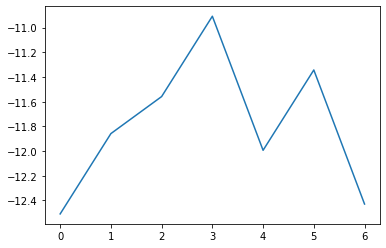

In [8]:
matrix = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
n = network(matrix, data.columns)
scores = [scorer.score(n)]

for i in range(len(matrix)):
    for j in range(len(matrix)):
        if i != j:
            n.matrix[i][j] = 1
            scores.append(scorer.score(n))
        
plt.plot(list(range(len(scores))), scores)

# 3. Learning Types of Relationships

In [15]:
from IPython.display import Image

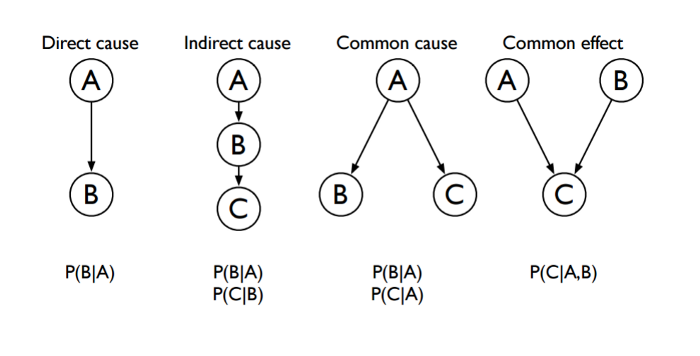

In [17]:
Image("images/relationships.png")

# 3. Simple Example

## 3.1 EP

## 3.2 A-HEP

# 4. On Dataset

## 4.1 Explain The Dataset

# 5. How Reliable Is This?

# 6. Insights - What I Would Recommend To This Bank